In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import PandasTools, Descriptors
from interaction_analysis import *
from utility import split_sdf
import shutil
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from pathlib import Path

In [4]:
HERE = Path(_dh[-1])
DATA = HERE / "dcc_data"
number_of_poses = 30
protein_name = "ECFT"
protein_path = DATA / "protein_protoss_noligand.pdb"

### HIT 1 compounds

In [5]:
HIPS6459 = r"O=C(O)c1cc(/C=N\NC(=O)c2cccc3ccccc23)ccc1O"
HIPS6790 = r"O=C(O)c1cc(/OCc2cccc3ccccc23)ccc1O"
HIPS6897 = 'NC(=O)c1cc(/C=N/NC(=O)CC23CC4CC(CC(C4)C2)C3)ccc1O'

hit1_inh_250 = [72.5,34,43.4]
hit1_ic_50 = [308 , 315 , 99.5 ] 
hit1_inh_200 = [11.6, 42.7 , 81.3]
hit1 = [HIPS6459, HIPS6790, HIPS6897]
hit1name = ['HIPS6459', 'HIPS6790', 'HIPS6897']

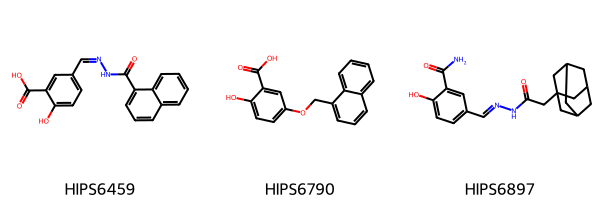

In [6]:
from PIL import Image
mol_list = [Chem.MolFromSmiles(smiles) for smiles in hit1]
img = Draw.MolsToGridImage(mol_list, molsPerRow=3, legends=hit1name, returnPNG=True)
img

### Experimental value

In [7]:
df_hit1 = pd.DataFrame({'ID': hit1name ,'IC50' : hit1_ic_50, '% Inh@200 μM ': hit1_inh_200,"% Inh@250 μM" : hit1_inh_250, 'smiles':hit1, 'Molecule': [Chem.MolFromSmiles(smiles) for smiles in hit1]})

display(df_hit1)

PandasTools.WriteSDF(df_hit1, 'data/ligands/hit_one.sdf',idName="ID", molColName='Molecule', properties=df_hit1.columns)

,ID,IC50,% Inh@200 μM,% Inh@250 μM,smiles,Molecule
0,HIPS6459,308.0,11.6,72.5,O=C(O)c1cc(/C=N\NC(=O)c2cccc3ccccc23)ccc1O,<rdkit.Chem.rdchem.Mol object at 0x7f0f60e44e40>
1,HIPS6790,315.0,42.7,34.0,O=C(O)c1cc(/OCc2cccc3ccccc23)ccc1O,<rdkit.Chem.rdchem.Mol object at 0x7f0f60e44900>
2,HIPS6897,99.5,81.3,43.4,NC(=O)c1cc(/C=N/NC(=O)CC23CC4CC(CC(C4)C2)C3)ccc1O,<rdkit.Chem.rdchem.Mol object at 0x7f0f60e44dd0>


In [8]:
from data_preparation import run_gypsumdl
#prepared_molecules_path1 = run_gypsumdl(f"data/ligands/hit_one.sdf", f"gypsum_dl_success_cleaned_hit1")

from docking import gnina_docking
snapshot_ID = "A"
sdf_output = "docked_gnina_pose_A_hitone_64.sdf"
ref_file = f"data/{snapshot_ID}/ref_ligand.pdb"

#gnina_docking(snapshot_ID, sdf_output, "data/ligands/stereoisomers.sdf", ref_file, "64", number_of_poses)

### GNINA predicted affinity
- 30 poses generated

#### HIT 1

In [9]:
docked_hit1 = PandasTools.LoadSDF('dcc_data/docked_gnina_pose_A_hitone_30pose.sdf')
docked_hit1['CNNaffinity'] = docked_hit1['CNNaffinity'].apply(pd.to_numeric)

display(docked_hit1[['CNNaffinity', 'ID']].sort_values('CNNaffinity', ascending=False).drop_duplicates('ID'))

,CNNaffinity,ID
0,5.710289,HIPS6459
60,5.563720,HIPS6897
33,5.417706,HIPS6790


#### RMSD of MD and generataed poses of GNINA

In [10]:
rmsds = rmsd_calculation('gnina', 30)
min_pose = [key for key, value in rmsds.items() if value == min(rmsds.values())]
print(min_pose,min(rmsds.values()), np.mean(list(rmsds.values())), np.std(list(rmsds.values())))

[11] 0.862590093846151 1.6837339011656354 0.42193864852638485


### HIT 1 GNINA poses hotspot interactions

In [11]:
ligands_path = DATA / "docked_gnina_pose_A_hitone_30pose"

plipify_ligand_protein_preparation(ligands_path, protein_path, protein_name)

for chain in ["C", "D"]:
    interaction_fp_generator(chain, ligands_path)

  0%|          | 0/90 [00:00<?, ?it/s]


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 90 seqs, avg length 207, max 207

00:00 19Mb   CPU has 8 cores, running 8 threads
00:03 551Mb   100.0% Calc posteriors
00:04 553Mb   100.0% Consistency (1/2)
00:04 553Mb   100.0% Consistency (2/2)
00:04 553Mb   100.0% UPGMA5           
00:04 556Mb   100.0% Refining




docked_gnina_pose_A_hitone_30pose

Chain C


  0%|          | 0/90 [00:00<?, ?it/s]


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 90 seqs, avg length 259, max 259

00:00 19Mb   CPU has 8 cores, running 8 threads
00:05 551Mb   100.0% Calc posteriors
00:05 554Mb   100.0% Consistency (1/2)
00:06 554Mb   100.0% Consistency (2/2)
00:06 554Mb   100.0% UPGMA5           
00:06 559Mb   100.0% Refining




docked_gnina_pose_A_hitone_30pose

Chain D


### SEESAR predicted affinity

In [12]:
docked_hit1_seesar = PandasTools.LoadSDF('dcc_data/docked_seesar_pose_A_hitone_30pose.sdf', )
docked_hit1_seesar['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'] = docked_hit1_seesar['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'].apply(pd.to_numeric)

docked_hit1_seesar['pose'] = docked_hit1_seesar['ID'].apply(lambda x: (x.split('_')[-1]))
docked_hit1_seesar['ID'] = docked_hit1_seesar['ID'].apply(lambda x: '_'.join(x.split('_')[:2]))
docked_hit1_seesar[['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', 'ID', 'pose']].sort_values('BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', ascending=True).drop_duplicates('ID')

,BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM],ID,pose
84,20.033918,HIPS6897_3,025
77,191.332564,HIPS6790_3,006
49,3339.130516,HIPS6459_3,009


### HIT 1 SEESAR poses hotspot interactions

In [29]:
ligands_path = DATA / "docked_seesar_pose_A_hitone_30pose"

plipify_ligand_protein_preparation(ligands_path, protein_path, protein_name)

for chain in ["C", "D"]:
    interaction_fp_generator(chain, ligands_path)

  0%|          | 0/90 [00:00<?, ?it/s]


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 90 seqs, avg length 207, max 207

00:00 19Mb   CPU has 8 cores, running 8 threads
00:03 551Mb   100.0% Calc posteriors
00:03 553Mb   100.0% Consistency (1/2)
00:03 553Mb   100.0% Consistency (2/2)
00:03 553Mb   100.0% UPGMA5           
00:04 556Mb   100.0% Refining




docked_seesar_pose_A_hitone_30pose

Chain C


  0%|          | 0/90 [00:00<?, ?it/s]


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 90 seqs, avg length 259, max 259

00:00 19Mb   CPU has 8 cores, running 8 threads
00:06 551Mb   100.0% Calc posteriors
00:06 554Mb   100.0% Consistency (1/2)
00:07 554Mb   100.0% Consistency (2/2)
00:07 554Mb   100.0% UPGMA5           
00:07 559Mb   100.0% Refining




docked_seesar_pose_A_hitone_30pose

Chain D


### SEESAR generated poses and rescored with GNINA

In [14]:
docked_hit1_seesar_rescored = PandasTools.LoadSDF('dcc_data/docked_seesar_pose_A_hitone_cnn_rescored_30pose.sdf', )
docked_hit1_seesar_rescored[['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', 'CNNaffinity']] = docked_hit1_seesar_rescored[['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', 'CNNaffinity']].apply(pd.to_numeric)

docked_hit1_seesar_rescored['pose'] = docked_hit1_seesar_rescored['ID'].apply(lambda x: (x.split('_')[-1]))
docked_hit1_seesar_rescored['ID'] = docked_hit1_seesar_rescored['ID'].apply(lambda x: '_'.join(x.split('_')[:2]))
docked_hit1_seesar_rescored[['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', 'ID', 'pose', 'CNNaffinity']].sort_values('CNNaffinity', ascending=False).drop_duplicates('ID')

,BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM],ID,pose,CNNaffinity
77,191.332564,HIPS6790_3,006,5.605103
82,36.519074,HIPS6897_3,008,5.562797
21,108885.355210,HIPS6459_3,005,5.540066


#### RMSD of MD and generataed poses of SEESAR

In [15]:
rmsds = rmsd_calculation('seesar', 30)
min_pose = [key for key, value in rmsds.items() if value == min(rmsds.values())]
print(min_pose,min(rmsds.values()), np.mean(list(rmsds.values())), np.std(list(rmsds.values())))

['015'] 0.28863943712536116 1.4663811299905325 0.668070099933622


# HIT2 compounds

In [16]:
HIPS6706 = 'O=C(N/N=C\c1ccc(-c2ccc(Cl)cc2)o1)c1ccc(Br)cc1'
HIPS7216 = 'C1=CC(=CC=C1C2=CC=C(O2)CNCC(=O)O[H])Cl'
HIPS7857 = 'O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3=CC=CC=C3'
HIPS7912 = 'O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3CCC3'

hit2 = [HIPS6706 , HIPS7216, HIPS7857, HIPS7912]
hit2name = ['HIPS6706' , 'HIPS7216', 'HIPS7857', 'HIPS7912']

hit2_inh_250 = [85.8, 1200, 52.2 , "unknown"]
hit2_ic_50 = [152.8, "unknown",56 , "unknown" ]
hit2_inh_200 = [59.5 , 10000 , 68.5, "unknown"]

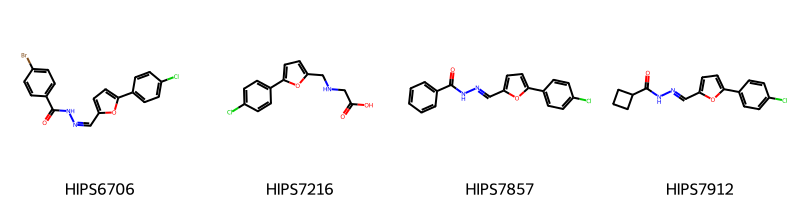

In [17]:
mol_list = [Chem.MolFromSmiles(smiles) for smiles in hit2]
img = Draw.MolsToGridImage(mol_list,molsPerRow=4, legends=hit2name)
img

### Experimental values

In [18]:
df_hit2 = pd.DataFrame({'ID': hit2name ,'IC50' : hit2_ic_50, '% Inh@200 μM ': hit2_inh_200,"% Inh@250 μM" : hit2_inh_250, 'smiles':hit2, 'Molecule': [Chem.MolFromSmiles(smiles) for smiles in hit2]})

display(df_hit2)

PandasTools.WriteSDF(df_hit2, 'data/ligands/hit_two.sdf',idName="ID", molColName='Molecule', properties=df_hit2.columns)

,ID,IC50,% Inh@200 μM,% Inh@250 μM,smiles,Molecule
0,HIPS6706,152.8,59.5,85.8,O=C(N/N=C\c1ccc(-c2ccc(Cl)cc2)o1)c1ccc(Br)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f0f4c8deeb0>
1,HIPS7216,unknown,10000,1200,C1=CC(=CC=C1C2=CC=C(O2)CNCC(=O)O[H])Cl,<rdkit.Chem.rdchem.Mol object at 0x7f0f4c8de660>
2,HIPS7857,56,68.5,52.2,O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3=CC=CC=C3,<rdkit.Chem.rdchem.Mol object at 0x7f0f4c8ded60>
3,HIPS7912,unknown,unknown,unknown,O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3CCC3,<rdkit.Chem.rdchem.Mol object at 0x7f0f4c8de6d0>


#### GNINA docking

In [19]:
from data_preparation import run_gypsumdl
#prepared_molecules_path2 = run_gypsumdl(f"data/ligands/hit_two.sdf", f"gypsum_dl_success_cleaned_hit2")
from docking import gnina_docking

snapshot_ID = "A"
sdf_output = "docked_gnina_pose_A_hittwo_64.sdf"
ref_file = f"data/{snapshot_ID}/ref_ligand.pdb"

#gnina_docking(snapshot_ID, sdf_output, "data/ligands/stereoisomers.sdf", ref_file, "64", 30)

### GNINA predicted affinity

In [20]:
docked_hit2 = PandasTools.LoadSDF('dcc_data/docked_gnina_pose_A_hittwo_30pose.sdf')
docked_hit2['CNNaffinity'] = docked_hit2['CNNaffinity'].apply(pd.to_numeric)

display(docked_hit2.sort_values('CNNaffinity', ascending=False).drop_duplicates('ID'))

,minimizedAffinity,CNNscore,CNNaffinity,CNN_VS,ID,ROMol
0,-6.90065,0.8367214799,6.497231,5.4363732338,HIPS6706,<rdkit.Chem.rdchem.Mol object at 0x7f0f5537dc80>
62,-6.76015,0.7167320251,6.162912,4.4171566963,HIPS7857,<rdkit.Chem.rdchem.Mol object at 0x7f0f4daab820>
95,-6.53298,0.5100594163,5.620191,2.8666310310,HIPS7912,<rdkit.Chem.rdchem.Mol object at 0x7f0f4daa0cf0>
32,-6.54928,0.7445629835,4.983367,3.7104306221,HIPS7216,<rdkit.Chem.rdchem.Mol object at 0x7f0f4c8b8510>


### HIT 2 GNINA poses hotspot interactions

In [21]:
ligands_path = DATA / "docked_gnina_pose_A_hittwo_30pose"

plipify_ligand_protein_preparation(ligands_path, protein_path, protein_name)

for chain in ["C", "D"]:
    interaction_fp_generator(chain, ligands_path)

  0%|          | 0/120 [00:00<?, ?it/s]


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 120 seqs, avg length 207, max 207

00:00 20Mb   CPU has 8 cores, running 8 threads
00:06 553Mb   100.0% Calc posteriors
00:07 558Mb   100.0% Consistency (1/2)
00:07 558Mb   100.0% Consistency (2/2)
00:07 558Mb   100.0% UPGMA5           
00:08 562Mb   100.0% Refining




docked_gnina_pose_A_hittwo_30pose

Chain C


  0%|          | 0/120 [00:00<?, ?it/s]


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 120 seqs, avg length 259, max 259

00:00 20Mb   CPU has 8 cores, running 8 threads
00:09 554Mb   100.0% Calc posteriors
00:10 559Mb   100.0% Consistency (1/2)
00:10 559Mb   100.0% Consistency (2/2)
00:10 559Mb   100.0% UPGMA5           
00:11 566Mb   100.0% Refining




docked_gnina_pose_A_hittwo_30pose

Chain D


### SEESAR predicted affinity

In [22]:
docked_hit2_seesar = PandasTools.LoadSDF('dcc_data/docked_seesar_pose_A_hittwo_30pose.sdf', )
docked_hit2_seesar['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'] = docked_hit2_seesar['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'].apply(pd.to_numeric)

docked_hit2_seesar['pose'] = docked_hit2_seesar['ID'].apply(lambda x: (x.split('_')[-1]))
docked_hit2_seesar['ID'] = docked_hit2_seesar['ID'].apply(lambda x: '_'.join(x.split('_')[:2]))
docked_hit2_seesar[['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', 'ID', 'pose']].sort_values('BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', ascending=True).drop_duplicates('ID')

,BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM],ID,pose
117,2.135167,HIPS6706_4,028
46,448.195039,HIPS7857_4,017
17,560.739470,HIPS7216_4,018
72,690.145191,HIPS7912_4,013


### HIT 2 SEESAR poses hotspot interactions

In [23]:
ligands_path = DATA / "docked_seesar_pose_A_hittwo_30pose"

plipify_ligand_protein_preparation(ligands_path, protein_path, protein_name)

for chain in ["C", "D"]:
    interaction_fp_generator(chain, ligands_path)

  0%|          | 0/120 [00:00<?, ?it/s]


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 120 seqs, avg length 207, max 207

00:00 20Mb   CPU has 8 cores, running 8 threads
00:06 553Mb   100.0% Calc posteriors
00:07 558Mb   100.0% Consistency (1/2)
00:07 558Mb   100.0% Consistency (2/2)
00:07 558Mb   100.0% UPGMA5           
00:08 562Mb   100.0% Refining




docked_seesar_pose_A_hittwo_30pose

Chain C


  0%|          | 0/120 [00:00<?, ?it/s]


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 120 seqs, avg length 259, max 259

00:00 20Mb   CPU has 8 cores, running 8 threads
00:09 553Mb   100.0% Calc posteriors
00:10 559Mb   100.0% Consistency (1/2)
00:11 559Mb   100.0% Consistency (2/2)
00:11 559Mb   100.0% UPGMA5           
00:12 566Mb   100.0% Refining




docked_seesar_pose_A_hittwo_30pose

Chain D


# HIT 1&2 isomers

In [24]:
from data_preparation import run_gypsumdl
from docking import gnina_docking

#prepared_molecules_pathstereo = run_gypsumdl(f"data/ligands/stereoisomers.sdf", f"gypsum_dl_success_cleaned_stereoisomers")

snapshot_ID = "A"
sdf_output = "docked_gnina_pose_A_stereo_64.sdf"
ref_file = f"data/{snapshot_ID}/ref_ligand.pdb"

#gnina_docking(snapshot_ID, sdf_output, "data/ligands/stereoisomers.sdf", ref_file, "64", 30)

### GNINA predicted affinity

In [25]:
docked_isomers = PandasTools.LoadSDF('dcc_data/docked_gnina_pose_A_stereo_30pose.sdf')
docked_isomers['CNNaffinity'] = docked_isomers['CNNaffinity'].apply(pd.to_numeric)

display(docked_isomers[['CNNaffinity', 'ID']].sort_values('CNNaffinity', ascending=False).drop_duplicates('ID'))

,CNNaffinity,ID
121,5.798020,HIPS6897-Z
240,5.730215,HIPS7857-E
270,5.727919,HIPS7857-Z
62,5.605931,HIPS6459-Z
2,5.462587,HIPS6790
180,5.457691,HIPS6706-E
94,5.382422,HIPS6897-E
210,5.337427,HIPS6706-Z
31,5.058466,HIPS6459-E
151,4.854415,HIPS7216


### SEESAR predicted affinity

In [26]:
docked_stereo_seesar = PandasTools.LoadSDF('dcc_data/docked_seesar_pose_A_stereo_30pose.sdf', )
# docked_hit1_seesar = docked_hit1_seesar.dropna(subset=['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'])
docked_stereo_seesar['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'] = docked_stereo_seesar['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'].apply(pd.to_numeric)

docked_stereo_seesar['pose'] = docked_stereo_seesar['ID'].apply(lambda x: (x.split('_')[-1]))
docked_stereo_seesar['ID'] = docked_stereo_seesar['ID'].apply(lambda x: '_'.join(x.split('_')[:2]))
docked_stereo_seesar[['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', 'ID', 'pose']].sort_values('BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]', ascending=True).drop_duplicates('ID')
# 

,BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM],ID,pose
197,99.470792,HIPS6897-E_5,017
190,290.437934,HIPS7857-E_5,025
189,290.437934,HIPS7857-Z_5,025
186,603.246799,HIPS6706-Z_5,009
185,603.246799,HIPS6706-E_5,009
180,680.758690,HIPS6459-E_5,007
138,1969.084638,HIPS6459-Z_5,001
112,3710.948924,HIPS6897-Z_5,030


#### Create 2D interaction photos for every generated poses using PoseView2D

In [27]:
sdf_files = glob.glob(f"dcc_data/*.sdf")
number_of_poses = 30

for sdf in sdf_files:
    docked_group = Path(sdf).stem
    docking_method = Path(sdf).stem.split('_')[1]
    split_sdf(sdf, docked_group, number_of_poses)
    create_2dposeview(docked_group, docking_method)

Skipping docked_gnina_pose_A_hittwo_30pose, already exists
Skipping docked_gnina_pose_A_hitone_30pose, already exists
Skipping docked_seesar_pose_A_stereo_30pose, already exists
Skipping docked_seesar_pose_A_hitone_cnn_rescored_30pose, already exists
Skipping docked_seesar_pose_A_hitone_30pose, already exists
Skipping docked_seesar_pose_A_hittwo_30pose, already exists
Skipping docked_gnina_pose_A_stereo_30pose, already exists


In [28]:
# for hit_type in ['hitone', 'hittwo', 'stereo']:
#     docked_group = f"HIT_{hit_type}_{number_of_poses}_POSES"
#     ligands_path = DATA / docked_group

#     if not os.path.exists(ligands_path):
#         split_sdf(f'dcc_data/docked_gnina_pose_A_stereo_64_30pose.sdf', docked_group, number_of_poses)

#     ligand_names = set([ligand.stem.split('_')[0] for ligand in list(ligands_path.glob("*"))])

#     for ligand in ligand_names:
#         new_path = ligands_path / ligand
        
#         if not os.path.exists(new_path):
#             os.makedirs( new_path, exist_ok=True)
#             for p in list(ligands_path.glob(f"{ligand}*")):
#                 shutil.move(str(p),  str(new_path))
    
#         plipify_ligand_protein_preparation(new_path, protein_path, protein_name)

#         for chain in ["C", "D"]:
            
#             interaction_fp_generator(chain, new_path)